In [1]:
%load_ext autoreload

In [2]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.1.0'

In [3]:
%autoreload 
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from pycaret.regression import *

# Import data

In [9]:
df = pd.read_csv('../data_feature_enigineering/df_selected_preprocessed_mean.csv')
df.head()

,date_forecast,direct_rad:W,sun_elevation:d,visibility:m,pressure_50m:hPa,relative_humidity_1000hPa:p,day_of_year,air_density_2m:kgm3,cloud_base_agl:m,ceiling_height_agl:m,...,sun_azimuth:d,wind_speed_v_10m:ms,day,wind_speed_10m:ms,total_cloud_cover:p,fresh_snow_24h:cm,fresh_snow_6h:cm,fresh_snow_1h:cm,building,pv_measurement
0,2019-06-02 22:00:00,0.00,-3.77425,40386.477,999.77500,71.674995,153,1.22825,1728.950,1728.950,...,348.03674,-0.500,2,3.600,100.000,0.0,0.0,0.0,0,0.00
1,2019-06-02 23:00:00,0.00,-4.35725,33770.650,998.65000,68.000000,153,1.22350,1689.825,1689.825,...,91.98075,0.275,2,3.350,100.000,0.0,0.0,0.0,0,0.00
2,2019-06-03 00:00:00,0.00,-3.30950,13595.500,997.97500,67.950000,154,1.21975,1563.225,1563.225,...,14.93475,0.750,3,3.050,100.000,0.0,0.0,0.0,0,0.00
3,2019-06-03 01:00:00,0.00,-0.82250,2321.850,997.44995,73.875000,154,1.21800,1283.425,1283.425,...,28.63025,0.875,3,2.725,100.000,0.0,0.0,0.0,0,0.00
4,2019-06-03 02:00:00,0.15,3.05125,11634.800,996.50000,79.925000,154,1.21800,1003.500,1003.500,...,41.99750,0.925,3,2.550,99.225,0.0,0.0,0.0,0,19.36


# PyCaret setup

In [10]:
s = setup(df, target = 'pv_measurement', session_id = 1, preprocess=False)

,Description,Value
0,Session id,1
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(92951, 21)"
4,Transformed data shape,"(92951, 21)"
5,Transformed train set shape,"(65065, 21)"
6,Transformed test set shape,"(27886, 21)"
7,Numeric features,19
8,Categorical features,1
9,Rows with missing values,17.9%


## Want to compare different tree models as they work well with this kinda problem

In [6]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'], n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,90.4117,65286.5277,255.1732,0.8894,1.4489,2.5996,131.5610


In [ ]:
lr = get_leaderboard()

In [8]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,90.4117,65286.5277,255.1732,0.8894,1.4489,2.5996,131.561


In [9]:
model = compare_tree_models

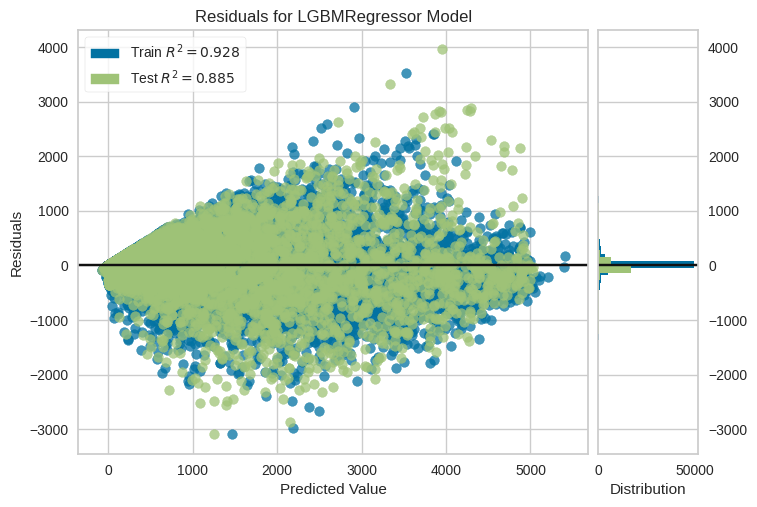

In [10]:
plot_model(model, plot = 'residuals')

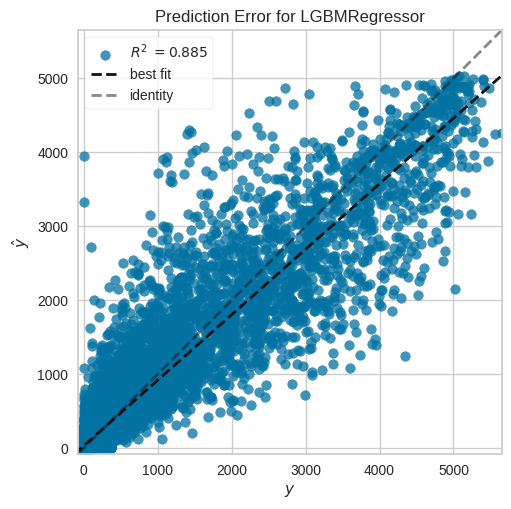

In [11]:
plot_model(model, plot = 'error')

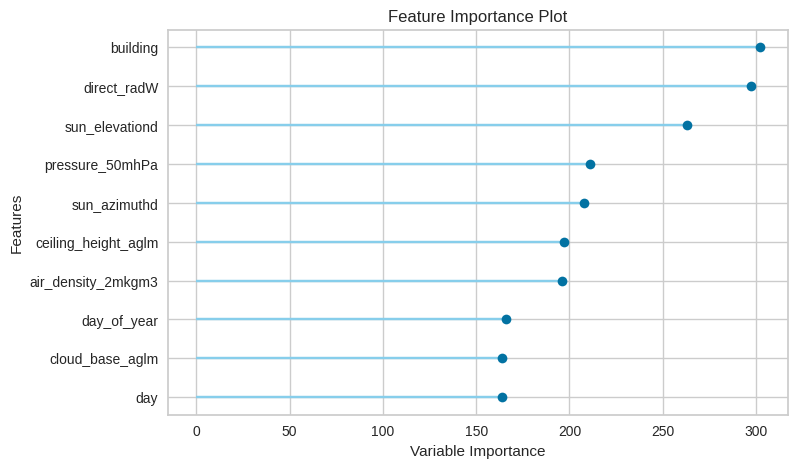

In [12]:
plot_model(model, plot = 'feature')

In [13]:
save_model(model, '01H_pycaret_lgbm_mean_with_feature_eng')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=1))]),
 '01H_pycaret_lgbm_mean_with_feature_eng.pkl')

In [6]:
model = load_model('01H_pycaret_lgbm_mean_with_feature_eng')

Transformation Pipeline and Model Successfully Loaded


In [11]:
tuned_model = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:42:27
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightG

KeyboardInterrupt: 